<div style="margin-bottom:-35px;">
    <font color=#FFFFFF markdown="1">
        <h1> <center> Gebaseerd op een cursus van:</center> </h1> 
    </font>
    <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>
</div>

<div style="background-color:#8B0000"> Activeer rechtsboven de venv 'venv_AI' als kernel van deze Notebook! </div>

<br>
<img src="../_afbeeldingen/kernel_venvAI.png" alt="Banner" style ="display: block; margin-left: auto; margin-right: auto; width: 40%"/> 

# Toepassing: Deep Learning Objectdetectie

<div style="background-color:#8B8000">
In deze notebook gaan jullie aan de slag met objectdetectie. Hiervoor wordt het Deep Learning model 'YOLO' gebruikt. Objectherkenning van een afbeelding & video komen aan bod. Hiernaast ook het belang van goede trainingsdata.
</div>

## 1. Algemene info

### 1.1 Modules installeren

Voer onderstaande code-cel uit. Het bevat de modules noodzakelijk voor deze notebook. Dit is een eenmalige actie. Lees verder terwijl de modules installeren.

<div style="background-color:#8B0000"> 
Controleert eerst dat deze notebook gebruik maakt van de venv 'venv_AI'. Vraag indien nodig aan de leerkracht om dit te controleren. Na het starten van de code-cel kan je gewoon verder lezen. Dan installeren de modules op de achtergrond.</div>

In [ ]:
# installeren van module ultralytics
%pip install ultralytics
# installeren van module opencv
%pip install opencv-python
# installeren van module matplotlib
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<div style="background-color:#000065"> 
Tijdens deze notebook zal je gebruik maken van drie modules. ultralytics bevat het Deep Learning model dat we zullen gebruiken. OpenCV-Python maakt het mogelijk om afbeelding/video te laden & verwerken. Via matplotlib tonen we afbeeldingen in de notebook.
</div>

### 1.2 Waarom Deep Learning voor objectherkenning?

In notebook `1_vormdetectie.ipynb` hebben we een algoritme voor vormherkenning gemaakt. Dit algoritme was puur regelgebaseerd (AI). Waardoor we reeds snel tegen beperkingen opbotsten. Voor objectherkenning slaan we Machine Learning over, om rechtstreeks naar Deep Learning te gaan.

Het is mogelijk om Machine Learning te gebruiken. Echter kunnen deze algoritmes enkel zeer specifieke zaken herkennen. De reden hiervoor zijn de beperkingen van computervisie (zie vorige notebook `1_vormdetectie.ipynb`). Deep Learning kan deze beperkingen (deels) elimineren. Dit doordat het een model opstelt met behulp van een grote hoeveelheid data.

Over het algemeen kunnen we zeggen dat Deep Learning objectherkenning volgende voordelen heeft:
- Mens hoeft niet aan te geven waar model op moet letten.
- Verwerkt grote hoeveelheid data, waardoor complexe patronen opgesteld worden. 
- Model kan op een later moment verder trainen. Dit om het te fine-tunen voor specifieke taken.

### 1.3 Hoe trainen Deep Learning modellen?

Je snapt nu waarom we Deep Learning zullen gebruiken. Het is echter ook belangrijk om te weten hoe deze modellen getraind zijn.

Als voorbeeld: hoe weet een Deep Learning model dat een collectie van pixels een kat is? Deep Learning modellen baseren zich vaak op de werking van het menselijk brein. De vraag is dus eigenlijk: `Hoe leert een brein het verschil tussen een kat en een hond?`

Het antwoord is **oefenen**. Tijdens het trainen geven we het model een hoop data. In dit geval afbeeldingen. Bij iedere afbeelding schrijven we wat deze afbeelding is (VB. kat, hond, koe, ...). Het model begint van nul. Het krijgt een afbeelding en zal in feite gokken wat het is.
- **Is het model juist?** Dan gebeurt er niets.
- **Is het model fout?**  Dan zal het model zijn parameters aanpassen, zodat het de foto later wel correct herkent.

Dit proces blijft zich herhalen, tot de ontwikkelaars vinden dat het model accuraat genoeg is. `Net als een mens, leren Deep Learning modellen dus door te oefenen.` Geef het genoeg voorbeelden en een model kan accuraat gokken wat er op een afbeelding staat. Om een deftige accuraatheid te bekomen, zijn er typisch duizenden voorbeelden per object nodig.

Ga [naar dit artikel](https://ferhat00.medium.com/deep-learning-with-keras-classifying-cats-and-dogs-part-1-982067594856) als je meer wilt lezen over het trainen van Deep Learning modellen. Het artikel gebruikt 4000 afbeeldingen van katten en honden om een eigen kathond-detector te maken. 

<img src="../_afbeeldingen/katten.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:30%"/>

### 1.4 YOLO -- een Deep Learning model

`YOLO` is een afkorting voor "You Only Look Once". Een populaire Deep Learning detectie-model. Het is populair omwille van zijn snelheid. Mensen kunnen in `real-time objecten detecteren`. Dit in tegenstelling tot andere modellen als `RetinaNet`.

De meeste Deep Learning modellen werken in 2 stappen: 
- Eerst zoeken ze regio's waar mogelijks een object staat (en zetten hier een kader rond). 
- Vervolgens detecteren ze welk object in deze regio aanwezig is. 

YOLO doet deze twee stappen tegelijk. Dit is sneller, maar zorgt wel voor een lagere accuraatheid. Onderstaande grafiek geeft dit duidelijk weer. De x-as toont de snelheid van verschillende modellen, de y-as accuraatheid.

<img src="../_afbeeldingen/yolo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:40%"/>

Bovenstaande grafiek toont versie 3 van Yolo. Versie 8 is echter de laatste versie. De technologie heeft natuurlijk niet stilgezeten. Deze nieuwste versie van Yolo is zowel sneller als accurater! Door de verbeteringen is het zelfs mogelijk om het model op een [Raspberry Pi](https://docs.ultralytics.com/guides/raspberry-pi/) te gebruiken.

## 2. Objectherkenning van afbeelding

### 2.1 Modules importeren & variabelen/functies klaarzetten 

Importeer de modules `ultralytics`, `cv2` & `matplotlib` (duurt enkele seconden).

In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

Voer hierna onderstaande cel uit om het YOLOv8 model in te laden.
<div style="background-color:#8B0000"> 
De eerste keer dat je deze cel uitvoert, zal ultralytics het model downloaden. Dit kan even duren. Merk op dat het bestand grijs is in het lint links. Dit omdat het aan .gitignore is toegevoegd. Dit is voor de veiligheid gedaan. Het bestand is te groot om naar GitHub te uploaden. Als je dit toch probeert, zal VS Code crashen.
</div>

In [5]:
yolo = YOLO('yolov8m.pt')

Tenslotte voer je onderstaande cel uit om de functie `plt_imshow` aan te maken. Deze functie toont de (verwerkte) afbeelding met `matplotlib`.
<div style="background-color:#8B8000"> 
Merk op dat deze functie reeds gebruikt is in notebook <b>1_vormdetectie.ipynb</b>.
</div>

In [6]:
# Functie om afbeelding weer te geven.
def plt_imshow(titel, afbeelding):
    plt.imshow(afbeelding, cmap='Greys_r')
    plt.title(titel)
    plt.grid(False)
    plt.show()

### 2.2 Welke objecten herkent Yolov8?

Laten we eerst kijken welke objecten Yolov8 kan herkennen.

In [ ]:
print(yolo.names)

#### Oefen mee 2.1

- Beantwoord volgende vragen: <div style="background-color:#008000"> 
    - Hoeveel objecten herkent YOLOv8? 79
    - Noem er 3:               banaan microgolf pizza             
    - In welk datatype is deze info opgeslagen? dictionary
</div>

### 2.3 Detecteren van een kat

Voer onderstaande code-cel uit. Deze toont de afbeelding `kat.jpg`.
<div style="background-color:#8B0000"> 
Links van de code-cel staan drie puntjes. Selecteer hier de optie <b>'clear cell outputs'</b> om de afbeelding te verwijderen. Probeer dit eens! Je gebruikt deze optie best doorheen de Notebook om hem overzichtelijk te houden.
</div>

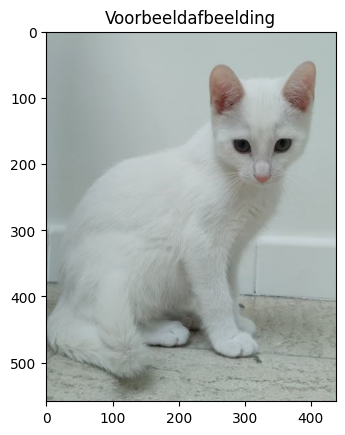

In [7]:
kat = cv2.imread("../_afbeeldingen/kat.jpg") 
kat = cv2.cvtColor(kat, cv2.COLOR_BGR2RGB)
plt_imshow("Voorbeeldafbeelding", kat)

We zullen nu de kat op deze afbeelding detecteren. Hiervoor wordt onderstaande code gebruikt. Deze bestaat uit 3 stappen.
1. Inladen afbeelding.
2. Objecten op afbeelding detecteren & rechthoeken rond tekenen.
3. Tonen verwerkte afbeelding.

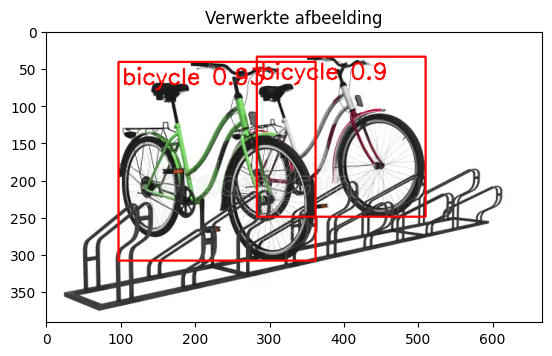

In [12]:
# STAP 1: inladen afbeelding.
afbeelding = cv2.imread(r'../_afbeeldingen/fietsen.png')
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)

# STAP 2: detecteer objecten & teken rechthoeken.
objecten = yolo(afbeelding, verbose=False)[0]
for object in objecten.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = object
    x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
    cv2.rectangle(afbeelding, (x1, y1), (x2,y2), (255,0,0), 2)
    tekst_positie = (x1 + 5, max(0, y1 + 30))  
    object_naam = yolo.names[class_id]
    cv2.putText(afbeelding, f'{object_naam} {round(score, 2)}', tekst_positie, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

# STAP 3: tonen verwerkte afbeelding.
plt_imshow("Verwerkte afbeelding", afbeelding)

#### Oefen mee 2.2

- Wijzig bovenstaande code. Zorg dat het kader rond de kat rood is, niet blauw.

- Leg uit wat de betekenis is van volgende waarden (Tip! print ze eerst) <div style="background-color:#008000">
    - class_id: wat hij denkt dat het is
    - score: hoe zeker hij ervan is
    
</div>

#### Oefen mee 2.3

- Wijzig bovenstaande code. 
    - Zorg dat bij het kader ook staat dat een kat (*cat*) gedetecteerd is. Voeg hiervoor onderstaande regel toe aan de for-loop.
    - Print naast het object ook hoe zeker het model is van zijn beslissing (op 2 cijfers na de komma).


In [ ]:
# Om tekst toe te voegen aan de afbeelding kan je deze code gebruiken.
# Uitleg: zet *tekst* op *(x,y)*-positie van afbeelding met bepaalde *kleur* (in [R,G,B]).
cv2.putText(afbeelding, tekst, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, kleur, 2)

Na de wijzigingen zou de afbeelding van de kat er (ongeveer) als volgt moeten uitzien.

<img src="../_afbeeldingen/objectdetectie_oefenmee2.3.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:15%"/>

#### Oefen mee 2.4
- In `oefen mee 2.3` zette je altijd kat (*cat*) bij het kader. Dit werkt natuurlijk enkel voor deze afbeelding. Zorg ervoor dat bij ieder gedetecteerd object de correcte naam staat. Gebruik hiervoor `yolo.names` uit deel 3.2, in combinatie met `class_id`. Hieronder enkele afbeeldingen waarmee je kan testen.
    - **_afbeeldingen/auto.jpg**: een *truck*.
    - **_afbeeldingen/fietsen.png**: twee *bicycles*.

Deze afbeeldingen verwerken, moet volgend resultaat geven.

<img src="../_afbeeldingen/objectdetectie_oefenmee2.4.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:60%"/>

## 3. Objectherkenning filteren

Tijdens dit onderdeel gebruiken we volgende afbeelding. Het toont een aantal mensen die in het park picnicken.

<img src="../_afbeeldingen/park_picnic.jpg" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:30%"/>

### 3.1 Modules importeren & variabelen/functies klaarzetten 

Importeer de modules `ultralytics`, `cv2` & `matplotlib`.

In [13]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

Voer hierna onderstaande cel uit om het YOLOv8 model in te laden.
<div style="background-color:#8B0000"> 
De eerste keer dat je deze cel uitvoert, zal ultralytics het model downloaden. Dit kan even duren. Het bestand is ook te groot om naar GitHub te uploaden. Daarom is het toegevoegd aan .gitignore.
</div>

In [14]:
yolo = YOLO('yolov8m.pt')

Tenslotte Voer je onderstaande cel uit om de functie `plt_imshow` aan te maken. Deze functie toont de (verwerkte) afbeelding met `matplotlib`.
<div style="background-color:#8B8000"> 
Merk op dat deze functie reeds gebruikt is in notebook <b>1_vormdetectie.ipynb</b>.
</div>

In [15]:
# Functie om afbeelding weer te geven.
def plt_imshow(titel, afbeelding):
    plt.imshow(afbeelding, cmap='Greys_r')
    plt.title(titel)
    plt.grid(False)
    plt.show()

### 3.2 Enkel specifieke objecten herkennen

#### Oefen mee 3.1

- Bekijk onderstaande code, voer deze uit en beantwoord vervolgens de vragen. Het is de bedoeling dat de code enkel personen detecteert. <div style="background-color:#008000">
    - Hoeveel 'personen' worden door de code gedetecteerd? 15
    - Hoe komt het dat ook objecten die geen 'persoon' zijn gedetecteerd worden? hij telt ieder object als persoon
</div>

- Pas de code aan om dit probleem op te lossen. Zorg er ook voor dat enkel kaders rond personen staan
<div style="background-color:#8B0000"> 
Enkel ALS het object een persoon is, teken er een kader rond en verhoog de teller. Het soort object wordt bijgehouden in <b>class_id</b>. Ga terug naar <b>deel 2.2</b> om te bepalen welke class_id overeenkomt met een mens.
</div>

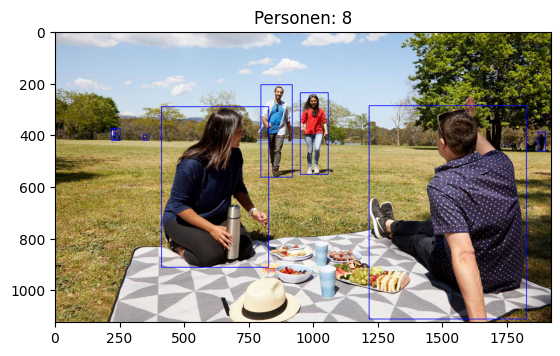

In [17]:
aantal = 0

# STAP 1: inladen afbeelding.
afbeelding = cv2.imread(r'../_afbeeldingen/park_picnic.jpg')
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)

# STAP 2: detecteer objecten & teken rechthoeken.
objecten = yolo(afbeelding, verbose=False)[0]
for object in objecten.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = object
    x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
    if class_id == 0:  # class_id 0 komt overeen met 'person'
        cv2.rectangle(afbeelding, (x1, y1), (x2, y2), (0, 0, 255), 2)
        aantal += 1

# STAP 3: tonen verwerkte afbeelding.
plt_imshow(f"Personen: {aantal}", afbeelding)

Op het einde van deze oefen mee moet de afbeelding er als volgt uitzien.

<img src="../_afbeeldingen/objectdetectie_oefenmee3.1.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:50%"/>

### 3.3 Enkel nauwkeurig objecten herkennen

Na het uitvoeren van `oefen mee 3.1` zijn er kaders getekend rond wat het model denkt dat mensen zijn... Echter hoe zeker is het model?

#### Oefen mee 3.2

Plaats in onderstaande kader de aangepaste code van `oefen mee 3.1`.
- Voeg code toe zodat voor iedere persoon ook de accuraatheid (score) geprint wordt. Afgerond op 2 cijfers na de komma.
- Voeg code toe zodat enkel personen met een accuraatheid boven 0,4 een kader rond zicht krijgen en de teller verhogen.

<div style="background-color:#8B0000"> 
Enkel ALS de score (=zekerheid) hoog genoeg is, willen we het object meetellen.
</div>

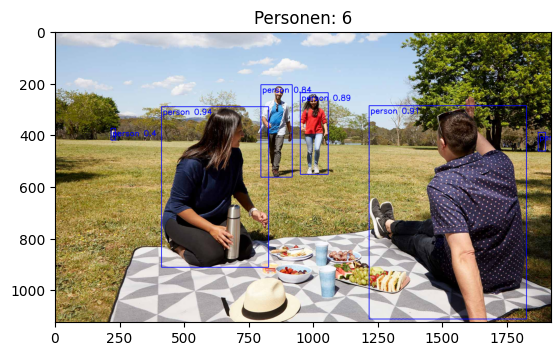

In [23]:
aantal = 0

# STAP 1: inladen afbeelding.
afbeelding = cv2.imread(r'../_afbeeldingen/park_picnic.jpg')
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)

# STAP 2: detecteer objecten & teken rechthoeken.
objecten = yolo(afbeelding, verbose=False)[0]
for object in objecten.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = object
    x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
    if class_id == 0 and score >= 0.4:  
        cv2.rectangle(afbeelding, (x1, y1), (x2, y2), (0, 0, 255), 2)
        tekst_positie = (x1 + 5, max(0, y1 + 30))  
        object_naam = yolo.names[class_id]
        cv2.putText(afbeelding, f'{object_naam} {round(score, 2)}', tekst_positie, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
        aantal += 1

# STAP 3: tonen verwerkte afbeelding.
plt_imshow(f"Personen: {aantal}", afbeelding)

Op het einde van deze oefen mee moet de afbeelding er als volgt uitzien.

<img src="../_afbeeldingen/objectdetectie_oefenmee3.2.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:50%"/>

#### Oefen mee 3.3

Plaats in onderstaande kader de aangepaste code van `oefen mee 3.2`.

- Vraag aan de gebruiker hoe nauwkeurig het algoritme moet optreden. Er zijn drie keuzes:
    - "niet": laat alle personen door.
    - "gemiddeld": alle personen met een score hoger dan 0,4.
    - "strict": alle personen met een score hoger dan 0,8.

- (optioneel) zoek zelf een aantal afbeeldingen op en pas er dit algoritme op toe.

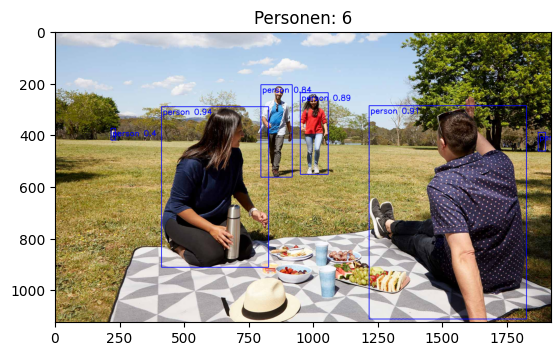

In [26]:
aantal = 0


keuze = input("Hoe nauwkeurig moet het algoritme zijn? (niet/gemiddeld/strict): ").lower()
if keuze == "niet":
    drempel = 0
elif keuze == "gemiddeld":
    drempel = 0.4
elif keuze == "strict":
    drempel = 0.8
else:
    print("Ongeldige keuze, standaard op 'niet'.")
    drempel = 0

# STAP 1: inladen afbeelding.
afbeelding = cv2.imread(r'../_afbeeldingen/park_picnic.jpg')
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)

# STAP 2: detecteer objecten & teken rechthoeken.
objecten = yolo(afbeelding, verbose=False)[0]
for object in objecten.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = object
    x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
    if class_id == 0 and score >= drempel:
        cv2.rectangle(afbeelding, (x1, y1), (x2, y2), (0, 0, 255), 2)
        tekst_positie = (x1 + 5, max(0, y1 + 30))
        object_naam = yolo.names[class_id]
        cv2.putText(afbeelding, f'{object_naam} {round(score, 2)}', tekst_positie, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
        aantal += 1

# STAP 3: tonen verwerkte afbeelding.
plt_imshow(f"Personen: {aantal}", afbeelding)

## 4. Objectherkenning van video

Tijdens dit onderdeel, zal onderstaande video gebruikt worden.

<video width="320" height="240" controls style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px">
  <source src="../_afbeeldingen/snelweg.mp4" type="video/mp4" >
</video>

### 4.1 Modules importeren & variabelen klaarzetten 

Importeer de modules `ultralytics`, `cv2`.

<div style="background-color:#8B0000"> 
Merk op dat <b>matplotlib</b> niet aanwezig is. Video's tonen via deze module is niet mogelijk. We gebruiken daarom een functionaliteit ingebouwd in <b>OpenCV</b>.
</div>

In [27]:
from ultralytics import YOLO
import cv2

Voer hierna onderstaande cel uit om het YOLOv8 model in te laden.
<div style="background-color:#8B0000"> 
De eerste keer dat je deze cel uitvoert, zal ultralytics het model downloaden. Dit kan even duren. Het bestand is ook te groot om naar GitHub te uploaden. Daarom is het toegevoegd aan .gitignore.
</div>

In [28]:
yolo = YOLO('yolov8m.pt')

### 4.2 Video splitsen in frames

Een video bestaat uit een hoop afbeeldingen (frames) die snel achter elkaar afgespeeld worden. Objectdetectie op een video, betekent eigenlijk objectdetectie toepassen op ieder frame.

Bekijk onderstaande code. Via OpenCV klasse `VideoCapture` laden we een video in. De methode `read` haalt het volgende frame op van de video.
<div style="background-color:#8B0000"> 
De video opent zich in een apart window. Druk op <b>'q'</b> om de video vroegtijdig te stoppen. 
</div>

In [31]:
# Stap 1: inladen video.
video = cv2.VideoCapture('../_afbeeldingen/snelweg.mp4')

while True:
    # Stap 2: haal ieder frame uit de video.
    ret, frame = video.read()
    if not ret:
        break 

    # STAP 3: detecteer objecten & teken rechthoeken op het huidige frame.
    frame = cv2.resize(frame, (780, 540), interpolation = cv2.INTER_LINEAR)
    voertuigen_class_ids = [2, 3, 5, 7]  
    aantal_voertuigen = 0
    objecten = yolo(frame, verbose=False)[0]
    for object in objecten.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = object
        x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
        if class_id in voertuigen_class_ids:
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            aantal_voertuigen += 1

    # Voeg tekst toe met het aantal voertuigen
    cv2.putText(frame, f"Voertuigen: {aantal_voertuigen}", (7, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    # Stap 4: tonen verwerkte frame.
    cv2.imshow("Snelweg", frame)
    key = cv2.waitKey(1)
    if key == ord('q'): # Duw op 'q' om video eerder te stoppen.
        break

cv2.destroyAllWindows() # Sluit braaf het laatst getoonde frame.

#### Oefen mee 4.1

Bovenstaande code is nog niet volledig. In deze oefen mee pas je bovenstaande code-cel aan.
- Vul de todo aan zodat er aan object herkenning gedaan wordt. Er moeten kaders verschijnen rond alle gedetecteerde objecten. Je mag zelf kiezen welke kleur. Baseer je hiervoor op de code uit **deel 2 en deel 3**
<div style="background-color:#8B0000"> 
We overlopen ieder individueel frame van de video. Je kan ieder frame beschouwen als een afbeelding.
</div>

- Pas de code verder aan. Zorg ervoor dat enkel gedetecteerde voertuigen omkaderd worden. Ga zelf na welke *class_id* overeenkomen met voertuigen.
<div style="background-color:#8B0000"> 
Voor meer info over de <b>class_id</b>. Ga terug naar <b>deel 2.2</b>.
</div>

- Voeg onderstaande code toe boven `cv2.imshow(...)`. Het voegt tekst toe aan het frame. Verander **VUL_AAN** door het aantal gedetecteerde voertuigen.
<div style="background-color:#8B0000"> 
Voor meer info over het tellen van objecten. Ga terug naar <b>deel 3.2</b>.
</div>

In [ ]:
cv2.putText(frame, f"Aantal voertuigen: {VUL_AAN}", (7,70),  cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)

Onderstaande afbeelding is een frame bekomen na het afwerken van bovenstaande drie stappen.<br><br>
<img src="../_afbeeldingen/objectdetectie_oefenmee4.1.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>

### 4.3 Framerate van objectdetectie (Extra)

Het is opgevallen dat de video afspelen zonder objectdetectie sneller is, dan met objectdetectie. De vraag is natuurlijk, hoeveel sneller? Dit bepalen we door de FPS (Frames Per Second) te tonen op het scherm. FPS geeft aan hoeveel frames van de video de computer per seconde kan afspelen. 

#### Oefen mee 4.2
Neem de code uit oefen mee 4.1 over in onderstaande code-cel.

- Voeg aan ieder frame tekst toe met erin de FPS. [Deze tutorial](https://www.geeksforgeeks.org/python-displaying-real-time-fps-at-which-webcam-video-file-is-processed-using-opencv/) legt uit hoe de FPS te berekenen.

- Vergelijk de FPS van de video zonder & met objectherkenning.  <div style="background-color:#008000">
    - Hoeveel trager is de video bij gebruik van objectherkenning? 1à keer zo traag
</div>

In [ ]:
# Stap 1: inladen video.
video = cv2.VideoCapture('../_afbeeldingen/snelweg.mp4')

while True:
    # Stap 2: haal ieder frame uit de video.
    ret, frame = video.read()
    if not ret:
        break 

    # STAP 3: detecteer objecten & teken rechthoeken op het huidige frame.
    frame = cv2.resize(frame, (780, 540), interpolation = cv2.INTER_LINEAR)
    voertuigen_class_ids = [2, 3, 5, 7]  
    aantal_voertuigen = 0
    objecten = yolo(frame, verbose=False)[0]
    for object in objecten.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = object
        x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
        if class_id in voertuigen_class_ids:
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            aantal_voertuigen += 1

    # Voeg tekst toe met het aantal voertuigen
    cv2.putText(frame, f"Voertuigen: {aantal_voertuigen}", (7, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    # Stap 4: tonen verwerkte frame.
    cv2.imshow("Snelweg", frame)
    key = cv2.waitKey(1)
    if key == ord('q'): # Duw op 'q' om video eerder te stoppen.
        break

cv2.destroyAllWindows() # Sluit braaf het laatst getoonde frame.

## 5. Belang van een goede dataset

In de vorige delen is gezien dat YOLO er in slaagt om objecten te herkennen op eenvoudige afbeeldingen. In dit deel tonen we aan dat het model echter verre van perfect is. Dit om duidelijk te maken dat de ontwikkelaar nog altijd goed moet nadenken over hoe een Deep Learning model te gebruiken.

### 5.1 Modules importeren & variabelen/functies klaarzetten 

Importeer de modules `ultralytics`, `cv2`, `matplotlib` & `random`.

In [32]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import random

Voer hierna onderstaande cel uit om het YOLOv8 model in te laden.
<div style="background-color:#8B0000"> 
De eerste keer dat je deze cel uitvoert, zal ultralytics het model downloaden. Dit kan even duren.
</div>

In [33]:
yolo = YOLO('yolov8m.pt')

Tenslotte voer je onderstaande cel uit om de functie `plt_imshow` aan te maken. Deze functie toont de (verwerkte) afbeelding met `matplotlib`.
<div style="background-color:#8B8000"> 
Merk op dat deze functie reeds gebruikt is in notebook <b>1_vormdetectie.ipynb</b>.
</div>

In [34]:
# Functie om afbeelding weer te geven.
def plt_imshow(titel, afbeelding):
    plt.imshow(afbeelding, cmap='Greys_r')
    plt.title(titel)
    plt.grid(False)
    plt.show()

### 5.2 De afbeelding `hondkat.png`

Eerst bekijken we een afbeelding met erop een aantal honden en katten.

#### Oefen mee 5.1

- Voer onderstaande cel uit.<div style="background-color:#008000">
    - Hoeveel honden tel jij: 6
    - Hoeveel katten tel jij: 6
</div>

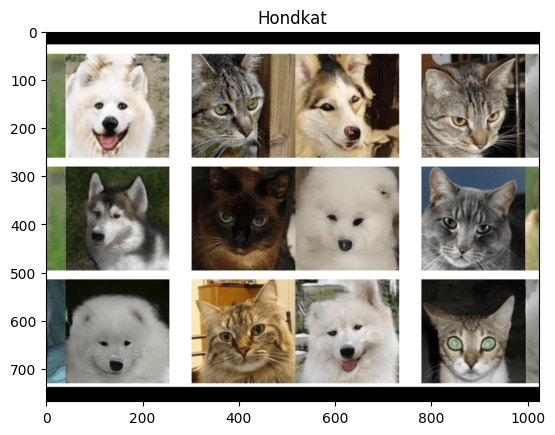

In [35]:
afbeelding = cv2.imread("../_afbeeldingen/hondkat.png") 
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)
plt_imshow("Hondkat", afbeelding)

- Laat nu het model los op deze afbeelding (voer volgende code-cel uit). <div style="background-color:#008000">
    - Hoeveel fouten maakt het model: 1
    - Waarom denk je dat het deze fouten (als er fouten zijn):(goeie zinsbouw) omdat  dit puntige oren heeft en daarom op een kat lijkt
</div>

<div style="background-color:#8B0000"> 
Merk de variabele <b>kleuren</b> op. Deze bevat een willekeurige kleur voor ieder object in het YOLO-model.
</div>

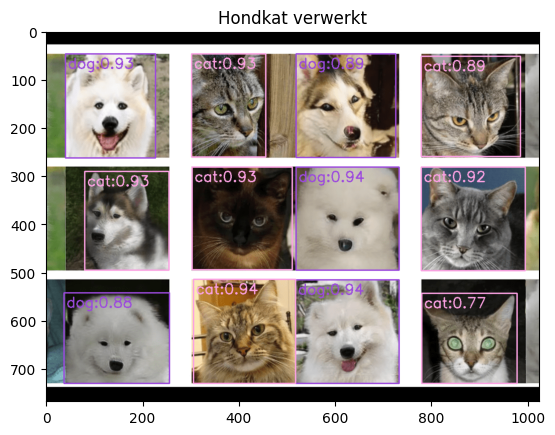

In [36]:
kleuren = [random.choices(range(256), k=3) for _ in range(len(yolo.names))]

# STAP 1: inladen afbeelding.
afbeelding = cv2.imread("../_afbeeldingen/hondkat.png")
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)

# STAP 2: detecteer objecten & teken rechthoeken.
objecten = yolo(afbeelding, verbose=False)[0]
for object in objecten.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = object
    x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
    cv2.rectangle(afbeelding, (x1, y1), (x2,y2), kleuren[class_id], 2)
    cv2.putText(afbeelding, f"{yolo.names[class_id]}:{round(score,2)}", (x1+5, y1+30), cv2.FONT_HERSHEY_SIMPLEX, 1, kleuren[class_id], 2)

# STAP 3: tonen verwerkte afbeelding.
plt_imshow("Hondkat verwerkt", afbeelding)

### 5.3 De afbeelding `hondcake.png`

Nu bekijken we een afbeelding met erop een aantal honden en cupcakes.

#### Oefen mee 5.2

- Voer onderstaande cel uit. Het bevat een afbeelding met erop honden & katten. <div style="background-color:#008000">
    - Hoeveel honden tel jij: 10
    - Hoeveel cupcakes tel jij: 8
</div>

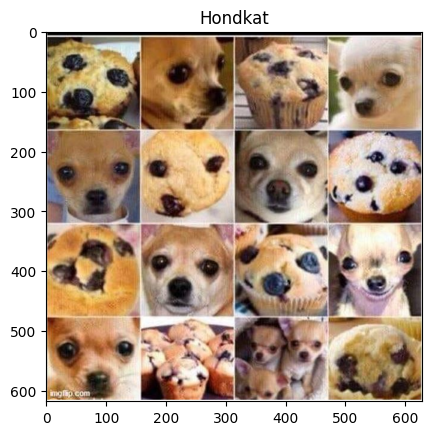

In [37]:
afbeelding = cv2.imread(r"../_afbeeldingen/hondcake.png") 
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)
plt_imshow("Hondkat", afbeelding)

- Laat nu het model los op deze afbeelding (voer volgende code-cel uit). <div style="background-color:#008000">
    - Hoeveel fouten maakt het model: 8
    - Welke zaken worden er op de afbeelding gedetecteerd: teddy beren
    - Waarom denk je dat het deze fouten (meerdere redenen): omdat sommige beesten daarop lijken
</div>

<div style="background-color:#8B0000"> 
Merk de variabele <b>kleuren</b> op. Deze bevat een willekeurige kleur voor ieder object in het YOLO-model.
</div>

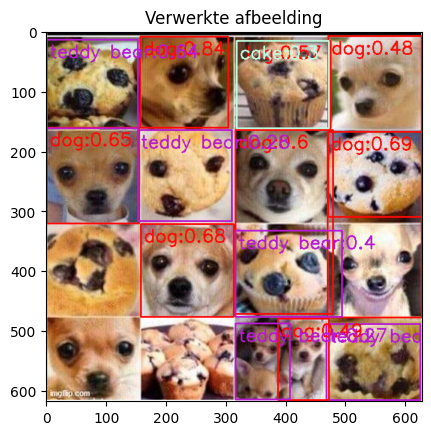

In [38]:
kleuren = [random.choices(range(256), k=3) for _ in range(len(yolo.names))]

# STAP 1: Inladen afbeelding
afbeelding = cv2.imread(r"../_afbeeldingen/hondcake.png")
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)

# STAP 2: detecteer objecten & teken rechthoeken.
objecten = yolo(afbeelding, verbose=False)[0]
for object in objecten.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = object
    x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
    cv2.rectangle(afbeelding, (x1, y1), (x2,y2), kleuren[class_id], 2)
    cv2.putText(afbeelding, f"{yolo.names[class_id]}:{round(score,2)}", (x1+5, y1+30), cv2.FONT_HERSHEY_SIMPLEX, 1, kleuren[class_id], 2)

# STAP 3: Tonen verwerkte afbeelding.
plt_imshow("Verwerkte afbeelding", afbeelding)

### 5.4 Conclusie

Een DL-model wordt getraind a.d.h.v. voorbeelden (ook wel een `dataset` genoemd). Een goede dataset bevat veel voorbeelden van alle zaken die het algoritme moet onderscheiden.

Stel dat je de `tomaten in je moestuin wilt herkennen`. Je neemt eerst heel wat foto's van tomaten. Waarna je deze foto's aan het model geeft, met op iedere afbeelding het label 'tomaat'. Het model zoekt dan zelf kenmerken die op elke foto voorkomen, bijvoorbeeld dat de `tomaat rond is en rood`. Plots merk je dat je systeem compleet ontregeld is, blijkbaar waren kinderen met een `rode bal´ in het beeld van de camera aan het spelen...

Als een ander voorwerp sterk lijkt op hetgeen jij wilt detecteren, dan kan dat ertoe leiden dat het model fouten maakt. Hetzelfde gebeurde in bovenstaande afbeelding. Om dit te voorkomen, moet je altijd goed nadenken over welke objecten allemaal in jouw omgeving zullen voorkomen. Het model moet getraind zijn om het verschil ertussen te zien!

Voorwerpen die sterk op elkaar lijken zijn een probleem waar zelf de beste *machine learning* en *deep learning* algoritmes nog op vast lopen. Dit toont dan ook het nut aan van een **uitgebreide en gevarieerde dataset**. 

Nog een aantal voorbeelden van afbeeldingen waar veel algoritmes op vast lopen zijn. Alle voorbeelden uit deze Notebook zijn niet realistisch, maar duiden wel het gevaar aan van een beperkte dataset. beeld je eens in dat iets soortgelijks zou gebeuren met een zelfrijdende wagen?
<table><tr>
<td><figure>
  <img src="../_afbeeldingen/hondkip.jpg" alt="Trulli" width="200">
    <figcaption><center>Hond of crispy chicken</center></figcaption>
</figure></td>
<td><figure>
  <img src="../_afbeeldingen/hondmop.jpg" alt="Trulli" width="200">
    <figcaption><center>Hond of mop</center></figcaption>
</figure></td>
<td><figure>
  <img src="../_afbeeldingen/slotchocoladekoek.jpg" alt="Trulli" width="200">
    <figcaption><center>Chocoladekoek of luiaard</center></figcaption>
</figure></td>
<td><figure>
  <img src="../_afbeeldingen/corgibrood.png" alt="Trulli" width="200">
    <figcaption><center>Corgi of brood</center></figcaption>
</figure> </td>
</tr></table>

#
  <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>

Deze Notebook is gebaseerd op: Notebook AI in de Landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van S. Pletinck , F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 